<a href="https://colab.research.google.com/github/TimkaThymineTimiryazevskaya/sf_data_science/blob/main/Project_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: классификация

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder, LabelBinarizer, MinMaxScaler
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [466]:
df = pd.read_csv('bank_fin.zip', sep = ';')

In [467]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Задание 2

In [468]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [469]:
df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

### Задание 3

In [470]:
df['balance'] = df['balance'].replace({'\$':''}, regex = True)
df['balance'] = df['balance'].replace({',':'.'}, regex = True)
df['balance'] = df['balance'].replace({' ':''}, regex = True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.00,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.00,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.00,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.00,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.00,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [471]:
df['balance'] = df['balance'].astype(float)
print(df["job"].mode())
print(df["education"].mode())

0    management
dtype: object
0    secondary
dtype: object


In [472]:
df['balance'].mean()

1529.1290293615875

### Задание 4

In [473]:
df['balance'] = df['balance'].fillna(df['balance'].median())
df['balance'].mean()

1526.9360329690019

### Задание 5

In [474]:
df["job"][df["job"] == "unknown"] =  "management"
df["education"][df["education"] == "unknown"]= "secondary"

In [475]:
df['education'].value_counts()

secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

In [476]:
df['job'].value_counts()

management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [477]:
df[(df['job']== 'management') & 
   (df['education']== 'secondary')].describe()

,age,balance,day,duration,campaign,pdays,previous
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,44.356383,1598.882979,16.295213,364.473404,2.699468,51.180851,0.835106
std,11.368992,2440.041545,8.663830,389.033393,4.023610,108.090008,2.124007
min,24.000000,-994.000000,1.000000,8.000000,1.000000,-1.000000,0.000000
25%,35.000000,171.000000,8.000000,121.750000,1.000000,-1.000000,0.000000
50%,44.000000,703.000000,17.000000,260.000000,2.000000,-1.000000,0.000000
75%,53.000000,2206.000000,23.000000,459.250000,3.000000,45.500000,1.000000
max,78.000000,19268.000000,31.000000,3881.000000,63.000000,683.000000,15.000000


### Задание 6

In [478]:
df['balance'].quantile(0.25)- (df['balance'].quantile(0.75)-df['balance'].quantile(0.25))*1.5

-2241.0

In [479]:
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<=lower_bound) | (x >= upper_bound)]
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, df_cleaned = (outliers_iqr(df, 'balance'))

## Часть 2:  Разведывательный анализ

### Задание 1

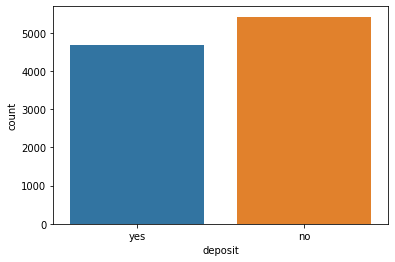

In [480]:
df_cleaned['deposit'].value_counts()
sns.countplot(df_cleaned['deposit'])

### Задания 2 и 3

In [481]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
df_cleaned['age'].max()

95

In [482]:
df_cleaned['duration'].min()

2

### Задания 4 и 5

In [483]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
df_cleaned.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


In [484]:
df_cleaned.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


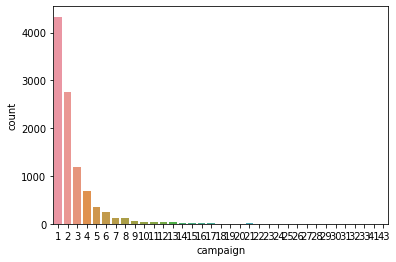

In [485]:
sns.countplot(df_cleaned['campaign'])


### Задание 6

In [486]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
df_cleaned['deposit'].groupby(df_cleaned['poutcome']).value_counts()

poutcome  deposit
failure   no          562
          yes         547
other     yes         265
          no          216
success   yes         861
          no           84
unknown   no         4562
          yes        3008
Name: deposit, dtype: int64

### Задание 7

In [487]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
df_cleaned['deposit'].groupby(df_cleaned['month']).value_counts()

month  deposit
apr    yes         513
       no          317
aug    no          775
       yes         610
dec    yes          84
       no            9
feb    yes         386
       no          323
jan    no          194
       yes         125
jul    no          836
       yes         582
jun    no          606
       yes         498
mar    yes         213
       no           24
may    no         1776
       yes         841
nov    no          456
       yes         324
oct    yes         273
       no           62
sep    yes         232
       no           46
Name: deposit, dtype: int64

### Задание 8

In [488]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
bins = [0, 29, 39, 49, 59, 100]
df_cleaned['cage'] = pd.cut(df_cleaned['age'], bins = bins)
df_cleaned['deposit'].groupby(df_cleaned['cage']).value_counts()

cage       deposit
(0, 29]    yes         861
           no          594
(29, 39]   no         2245
           yes        1716
(39, 49]   no         1444
           yes         938
(49, 59]   no          984
           yes         670
(59, 100]  yes         496
           no          157
Name: deposit, dtype: int64

### Задания 9 и 10

In [489]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного стат
df_cleaned['deposit'].groupby(df_cleaned['marital']).value_counts()

marital   deposit
divorced  no          624
          yes         553
married   no         3303
          yes        2412
single    yes        1716
          no         1497
Name: deposit, dtype: int64

In [490]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
df_cleaned['education'].groupby(df_cleaned['deposit']).value_counts()

deposit  education
no       secondary    3066
         tertiary     1526
         primary       832
yes      secondary    2451
         tertiary     1713
         primary       517
Name: education, dtype: int64

In [491]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
df_cleaned['job'].groupby(df_cleaned['deposit']).value_counts()

deposit  job          
no       management       1180
         blue-collar      1155
         technician        900
         admin.            672
         services          523
         retired           231
         self-employed     197
         entrepreneur      189
         housemaid         153
         unemployed        143
         student            81
yes      management       1135
         technician        738
         blue-collar       652
         admin.            574
         retired           432
         services          345
         student           245
         unemployed        189
         self-employed     161
         entrepreneur      111
         housemaid          99
Name: job, dtype: int64

### Задание 11

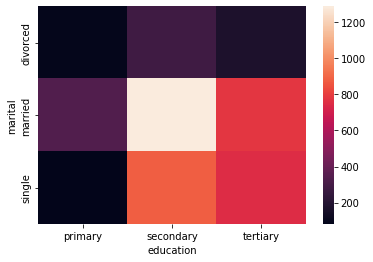

In [492]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
a1 = pd.pivot_table(df_cleaned[df_cleaned['deposit']== 'yes'], values = 'deposit', index = 'marital', columns = 'education', aggfunc = 'count')
a2 = pd.pivot_table(df_cleaned[df_cleaned['deposit']== 'no'], values = 'deposit', index = 'marital', columns = 'education', aggfunc = 'count')
sns.heatmap(a1)


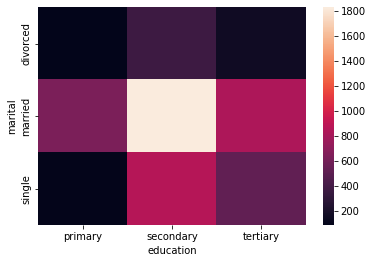

In [493]:
sns.heatmap(a2)


## Часть 3: преобразование данных

### Задание 1

In [494]:
LE = LabelEncoder()
df_cleaned['ed'] = LE.fit_transform(df_cleaned['education'])
df_cleaned['ed'].sum()

11995

In [495]:
LE = LabelEncoder()
df_cleaned['cage'] = LE.fit_transform(df_cleaned['cage'])
df_cleaned['cage'].sum()

16299

### Задания 2 и 3

In [496]:
# преобразуйте бинарные переменные в представление из нулей и единиц
LB = LabelBinarizer()
df_cleaned['dep'] = LB.fit_transform(df_cleaned['deposit'])
df_cleaned['dep'].std()

0.4986712532452124

In [497]:
df_cleaned['def'] = LB.fit_transform(df_cleaned['default'])
df_cleaned['house'] = LB.fit_transform(df_cleaned['housing'])
df_cleaned['lo'] = LB.fit_transform(df_cleaned['loan'])

print(df_cleaned['lo'].mean()+df_cleaned['house'].mean()+df_cleaned['def'].mean())

0.6354280059376547


### Задание 4

In [498]:
# создайте дамми-переменные
df_cleaned = pd.get_dummies(df_cleaned, columns = ['job',
'marital',
'contact',
'month',
'poutcome'])

In [499]:
df_cleaned.head(5)

,age,education,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,secondary,no,2343.0,yes,no,5,1042,1,-1,...,0,0,1,0,0,0,0,0,0,1
1,56,secondary,no,45.0,no,no,5,1467,1,-1,...,0,0,1,0,0,0,0,0,0,1
2,41,secondary,no,1270.0,yes,no,5,1389,1,-1,...,0,0,1,0,0,0,0,0,0,1
3,55,secondary,no,2476.0,yes,no,5,579,1,-1,...,0,0,1,0,0,0,0,0,0,1
4,54,tertiary,no,184.0,no,no,5,673,2,-1,...,0,0,1,0,0,0,0,0,0,1


### Задания 5 и 6

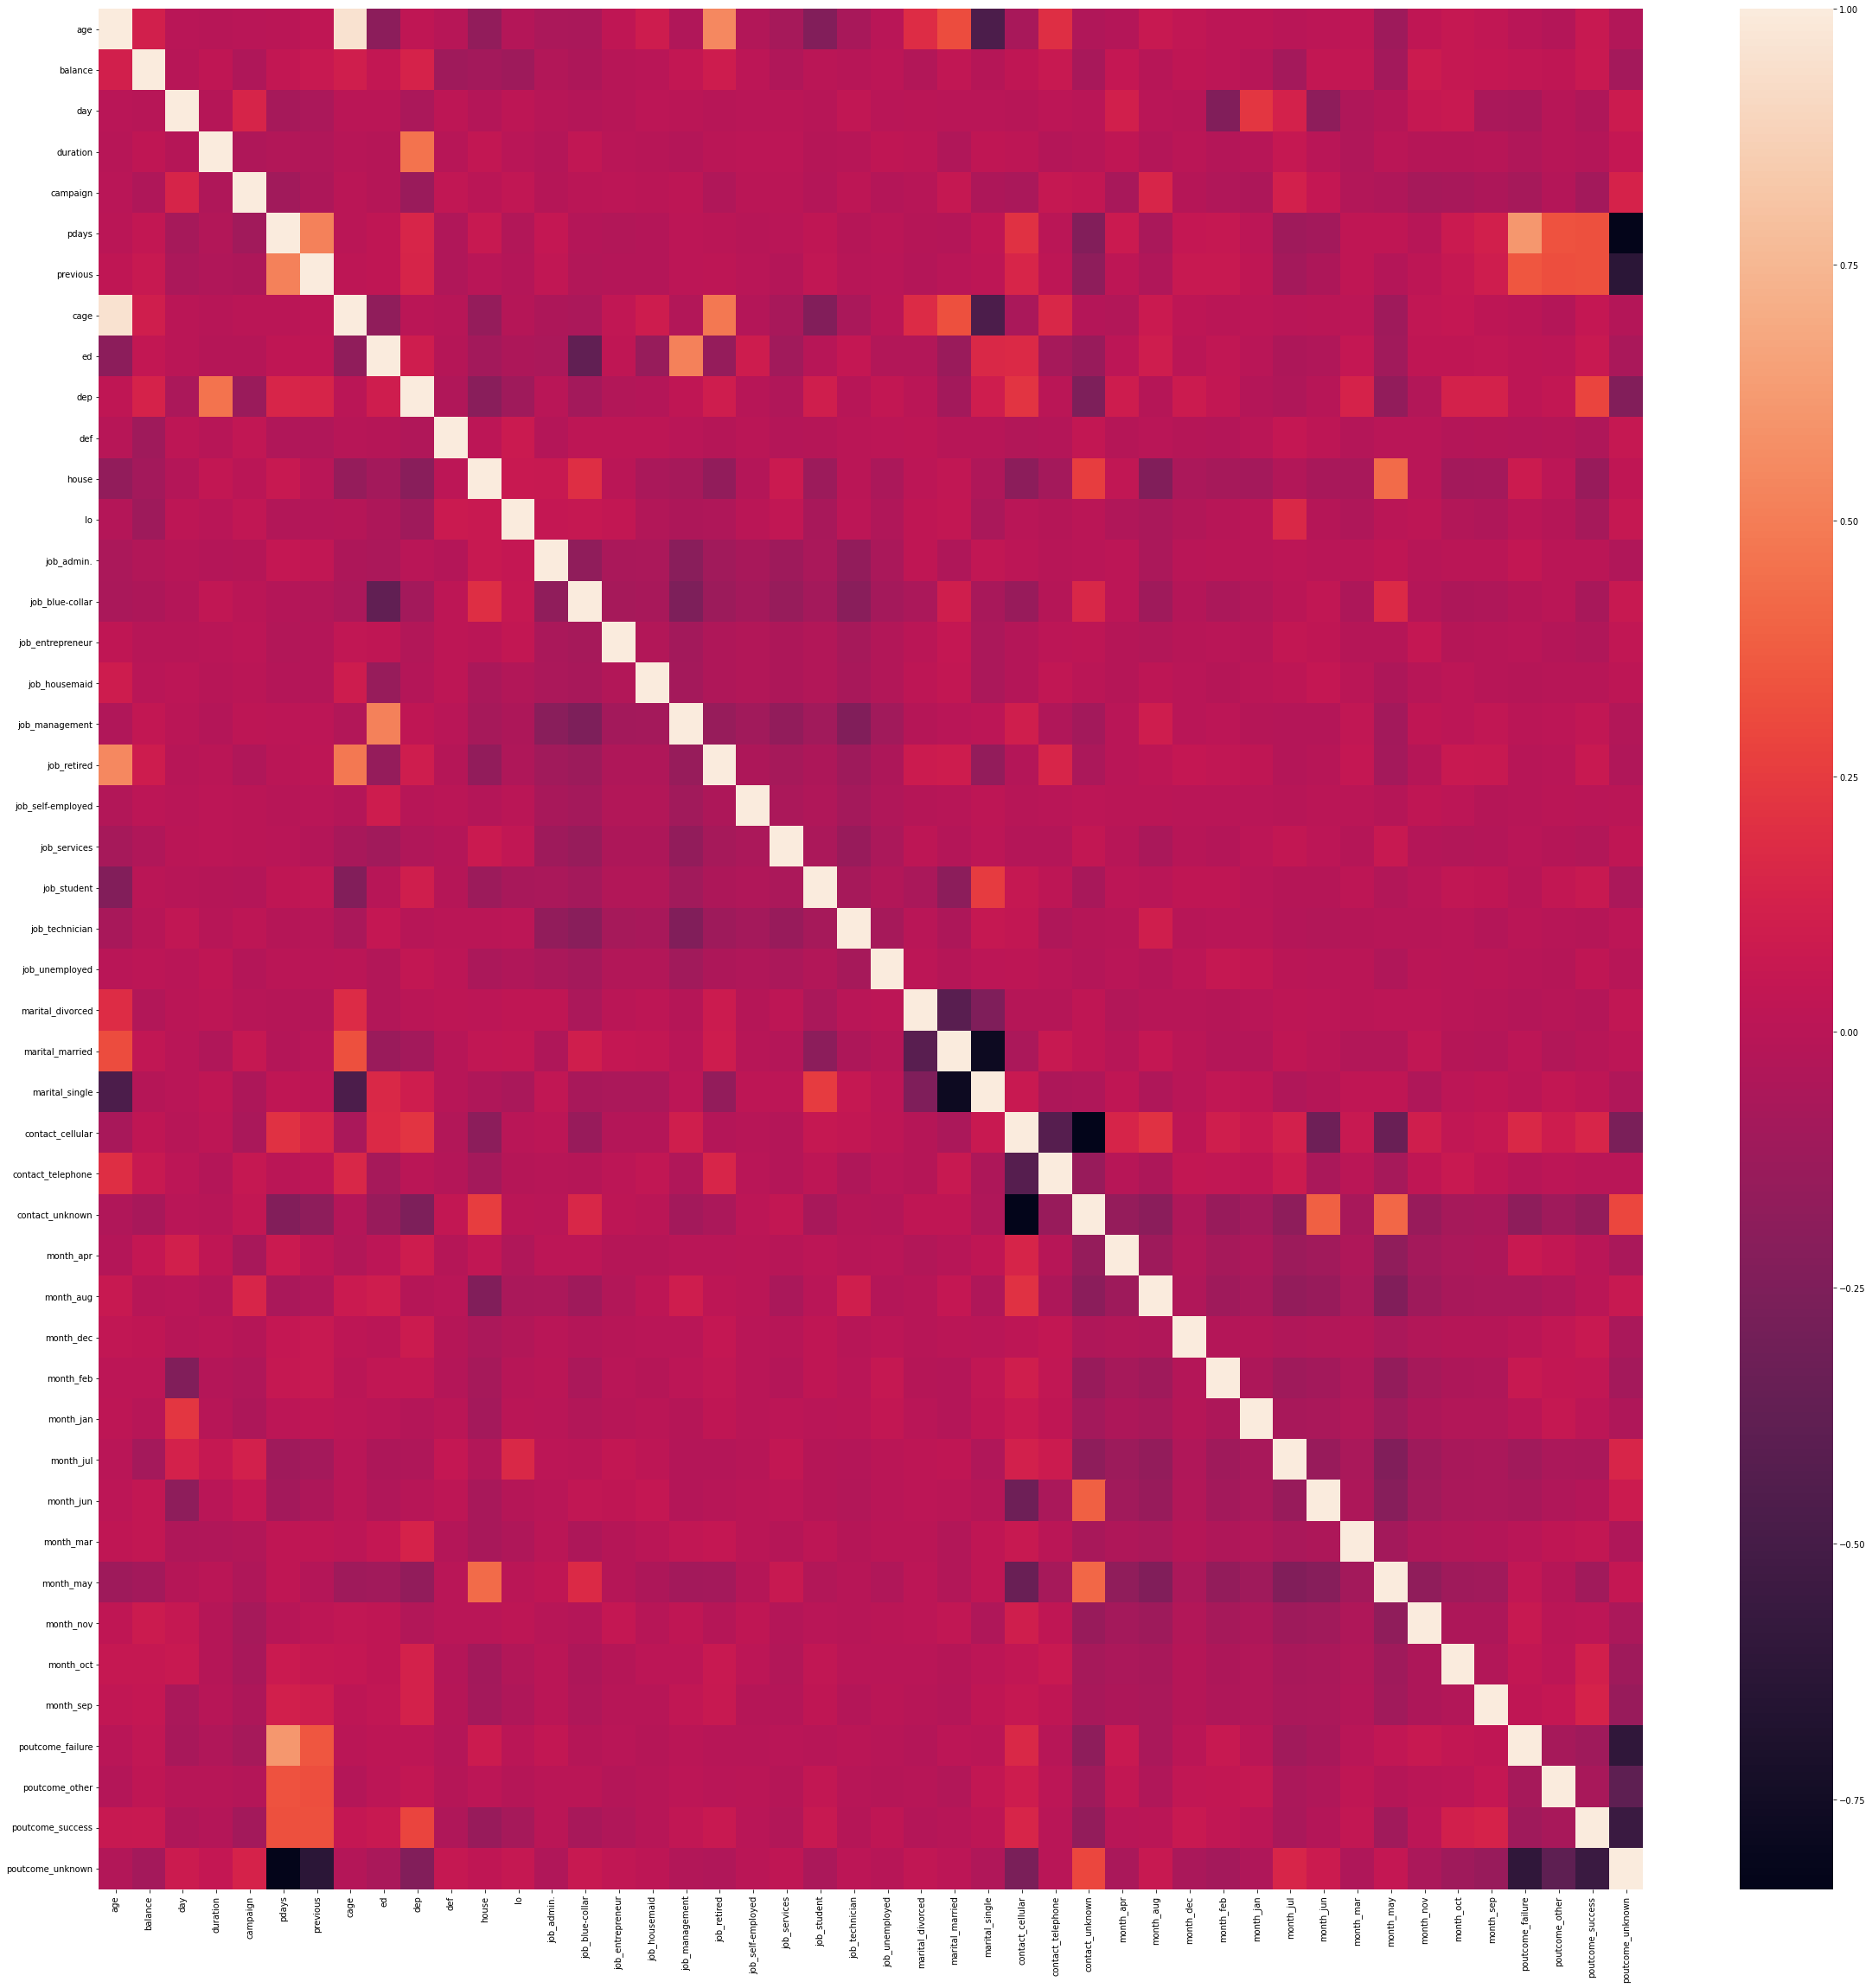

In [500]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
plt.figure(figsize=(40, 40))
sns.heatmap(df_cleaned.corr())

### Задания 7 и 8

In [501]:
X = df_cleaned.drop(['dep'], axis=1)
y = df_cleaned['dep']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [502]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3335 entries, 3333 to 3818
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3335 non-null   int64  
 1   education          3335 non-null   object 
 2   default            3335 non-null   object 
 3   balance            3335 non-null   float64
 4   housing            3335 non-null   object 
 5   loan               3335 non-null   object 
 6   day                3335 non-null   int64  
 7   duration           3335 non-null   int64  
 8   campaign           3335 non-null   int64  
 9   pdays              3335 non-null   int64  
 10  previous           3335 non-null   int64  
 11  deposit            3335 non-null   object 
 12  cage               3335 non-null   int64  
 13  ed                 3335 non-null   int64  
 14  def                3335 non-null   int64  
 15  house              3335 non-null   int64  
 16  lo                 33

In [503]:
y_test.mean()

0.46326836581709147

### Задание 9

In [504]:
X_train = X_train.drop(columns = ['education', 'default', 'housing', 'loan', 'deposit'])
X_test = X_test.drop(columns = ['education', 'default', 'housing', 'loan', 'deposit'])

In [505]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

X_new = SelectKBest(k = 15, score_func = f_classif).fit(X_train, y_train)
X_new.get_feature_names_out()
X_train = X_train[X_new.get_feature_names_out()]

In [506]:
X_new_test = X_test[X_new.get_feature_names_out()]

### Задание 10

In [507]:
# нормализуйте данные с помощью minmaxsxaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_new_test)


In [508]:
X_train = pd.DataFrame(X_train_scaled, columns = X_new.get_feature_names_out())
X_test = pd.DataFrame(X_test_scaled, columns = X_new.get_feature_names_out())

In [509]:
X_test.head(5)

,balance,duration,campaign,pdays,previous,house,lo,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown
0,0.349484,0.092850,0.000,0.113390,0.036364,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.408924,0.021676,0.000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.557276,0.068263,0.175,0.394451,0.036364,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.535132,0.074086,0.050,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.502498,0.168230,0.025,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [510]:
X_test.mean()

balance             0.459018
duration            0.116754
campaign            0.037961
pdays               0.064088
previous            0.015292
house               0.484858
lo                  0.131934
contact_cellular    0.718741
contact_unknown     0.209295
month_mar           0.023688
month_may           0.251574
month_oct           0.031484
month_sep           0.029385
poutcome_success    0.097451
poutcome_unknown    0.743928
dtype: float64

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [511]:
# обучите логистическую регрессию и рассчитайте метрики качества
LG = linear_model.LogisticRegression(solver = 'sag', random_state = 42, max_iter=1000)
LG.fit(X_train, y_train)
y_pred = LG.predict(X_test)

print(	
metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83      1790
           1       0.79      0.81      0.80      1545

    accuracy                           0.82      3335
   macro avg       0.81      0.82      0.81      3335
weighted avg       0.82      0.82      0.82      3335



### Задания 2,3,4

In [512]:
# обучите решающие деревья, настройте максимальную глубину
dtl = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtl.fit(X_train, y_train)
y_pred = dtl.predict(X_test)
print(	
metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1790
           1       0.71      0.77      0.74      1545

    accuracy                           0.74      3335
   macro avg       0.74      0.75      0.74      3335
weighted avg       0.75      0.74      0.74      3335



In [523]:
dtl = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = 6 )
dtl.fit(X_train, y_train)
y_pred = dtl.predict(X_test)
print(	
metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1790
           1       0.77      0.82      0.79      1545

    accuracy                           0.80      3335
   macro avg       0.80      0.80      0.80      3335
weighted avg       0.81      0.80      0.80      3335



### Задание 5

In [528]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split': [2, 5, 7, 10],
              'max_depth':[3,5,7]
                  }
grid_search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 42), 
    param_grid=param_grid, 
    cv=5, 
    n_jobs = -1
)
grid_search.fit(X_train, y_train) 
y_test_pred = grid_search.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.79


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [531]:
# обучите на ваших данных случайный лес
rf = ensemble.RandomForestClassifier(n_estimators = 100,
criterion = 'gini',
min_samples_leaf = 5,
max_depth = 10,
random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(	
metrics.accuracy_score(y_test, y_pred))
print(	
metrics.recall_score(y_test, y_pred))

0.8209895052473763
0.889967637540453


### Задания 2 и 3

In [534]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(
learning_rate = 0.05,
n_estimators = 300,
min_samples_leaf = 5,
max_depth = 5,
random_state = 42
)
gb.fit(X_train, y_train)
 
y_pred  = gb.predict(X_test)
print(	
metrics.f1_score(y_test, y_pred))

0.8168509112638184


### Задание 4

In [551]:
# объедините уже известные вам алгоритмы с помощью стекинга 
estimators = [
    ('lr', linear_model.LogisticRegression(solver = 'sag', random_state = 42, max_iter=1000)),
    ('dt',  tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 42 ),
     'rf', ensemble.GradientBoostingClassifier(learning_rate = 0.05,n_estimators = 300,min_samples_leaf = 5,max_depth = 5,random_state = 42))
]
from sklearn.ensemble import StackingRegressor


In [552]:
reg = ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(solver = 'sag', random_state = 42, max_iter=1000)
)
 
#Обучаем модель
reg.fit(X_train, y_train)
y_pred  = reg.predict(X_test)
print(	
metrics.precision_score(y_test, y_pred))

0.7866748166259169


### Задание 5

In [ ]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

### Задания 6,7,8

In [553]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna

!pip install optuna
import optuna
def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train))

  return score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.2 MB/s eta 0:00:00


In [554]:
%%time
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
study.optimize(optuna_rf, n_trials=20)

[I 2023-02-19 14:23:14,369] A new study created in memory with name: RandomForestClassifier
[I 2023-02-19 14:23:16,367] Trial 0 finished with value: 0.8751560549313359 and parameters: {'n_estimators': 177, 'max_depth': 27, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8751560549313359.
[I 2023-02-19 14:23:19,229] Trial 1 finished with value: 0.8418910457107076 and parameters: {'n_estimators': 136, 'max_depth': 27, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8751560549313359.
[I 2023-02-19 14:23:21,952] Trial 2 finished with value: 0.8398876404494382 and parameters: {'n_estimators': 185, 'max_depth': 18, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.8751560549313359.
[I 2023-02-19 14:23:22,959] Trial 3 finished with value: 0.8574557972148332 and parameters: {'n_estimators': 156, 'max_depth': 30, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8751560549313359.
[I 2023-02-19 14:23:23,905] Trial 4 finished with value: 0.8465989053948398 and parameters: {'

CPU times: user 20.5 s, sys: 13.5 ms, total: 20.5 s
Wall time: 25.9 s


In [556]:
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42 )
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.817


In [557]:
print('f1_score на тестовом наборе: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.816
